In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Packages Loaded Successfully")

Packages Loaded Successfully


In [4]:
file_path = "cicids2017_cleaned.csv"
df_sample = pd.read_csv(file_path,nrows=5000)
df_sample.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [5]:
df_sample.info()
print("\nNull values per column:")
print(df_sample.isnull().sum().sort_values(ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             5000 non-null   int64  
 1   Flow Duration                5000 non-null   int64  
 2   Total Fwd Packets            5000 non-null   int64  
 3   Total Length of Fwd Packets  5000 non-null   int64  
 4   Fwd Packet Length Max        5000 non-null   int64  
 5   Fwd Packet Length Min        5000 non-null   int64  
 6   Fwd Packet Length Mean       5000 non-null   float64
 7   Fwd Packet Length Std        5000 non-null   float64
 8   Bwd Packet Length Max        5000 non-null   int64  
 9   Bwd Packet Length Min        5000 non-null   int64  
 10  Bwd Packet Length Mean       5000 non-null   float64
 11  Bwd Packet Length Std        5000 non-null   float64
 12  Flow Bytes/s                 5000 non-null   float64
 13  Flow Packets/s    

Detected Label column: Attack Type


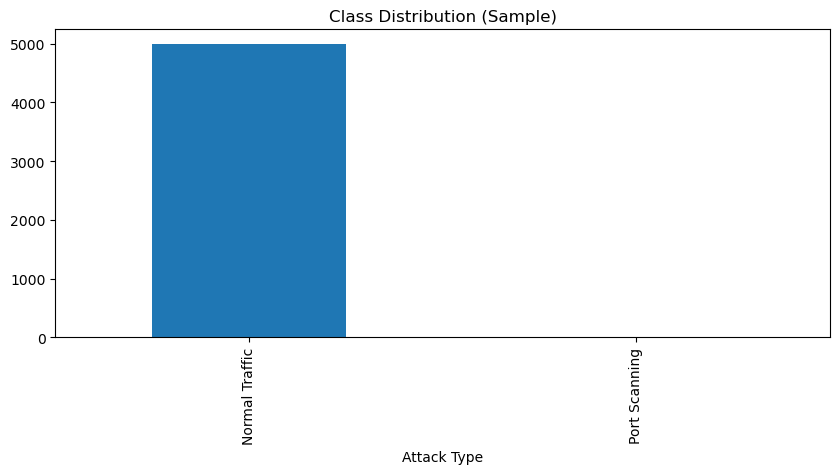

In [6]:
label_col = [col for col in df_sample.columns if "label" in col.lower() or "attack" in col.lower()][0]
print(f"Detected Label column: {label_col}")

df_sample[label_col].value_counts().plot(kind='bar',figsize=(10,4))
plt.title("Class Distribution (Sample)")
plt.show()

In [7]:
numeric_cols = df_sample.select_dtypes(include=np.number).columns
df_sample[numeric_cols].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
Destination Port,5000.0,5.958888e+03,1.587812e+04,0.0,53.0,53.0,443.000000,6.425300e+04
Flow Duration,5000.0,1.091736e+07,3.007406e+07,1.0,188.0,31236.0,317570.250000,1.199989e+08
Total Fwd Packets,5000.0,6.876200e+00,2.688411e+01,1.0,1.0,2.0,4.000000,6.510000e+02
Total Length of Fwd Packets,5000.0,4.585248e+02,1.659386e+03,0.0,40.0,68.0,152.000000,3.407600e+04
Fwd Packet Length Max,5000.0,1.528772e+02,3.889341e+02,0.0,28.0,42.0,59.000000,6.145000e+03
Fwd Packet Length Min,5000.0,2.493700e+01,3.858276e+01,0.0,0.0,29.0,43.000000,1.472000e+03
Fwd Packet Length Mean,5000.0,4.998737e+01,9.349649e+01,0.0,18.5,39.0,50.000000,1.650429e+03
Fwd Packet Length Std,5000.0,4.365726e+01,1.350025e+02,0.0,0.0,0.0,5.311328,2.117662e+03
Bwd Packet Length Max,5000.0,3.701832e+02,7.819813e+02,0.0,6.0,89.0,174.250000,4.757000e+03
Bwd Packet Length Min,5000.0,5.833340e+01,7.726309e+01,0.0,0.0,47.0,101.000000,1.442000e+03


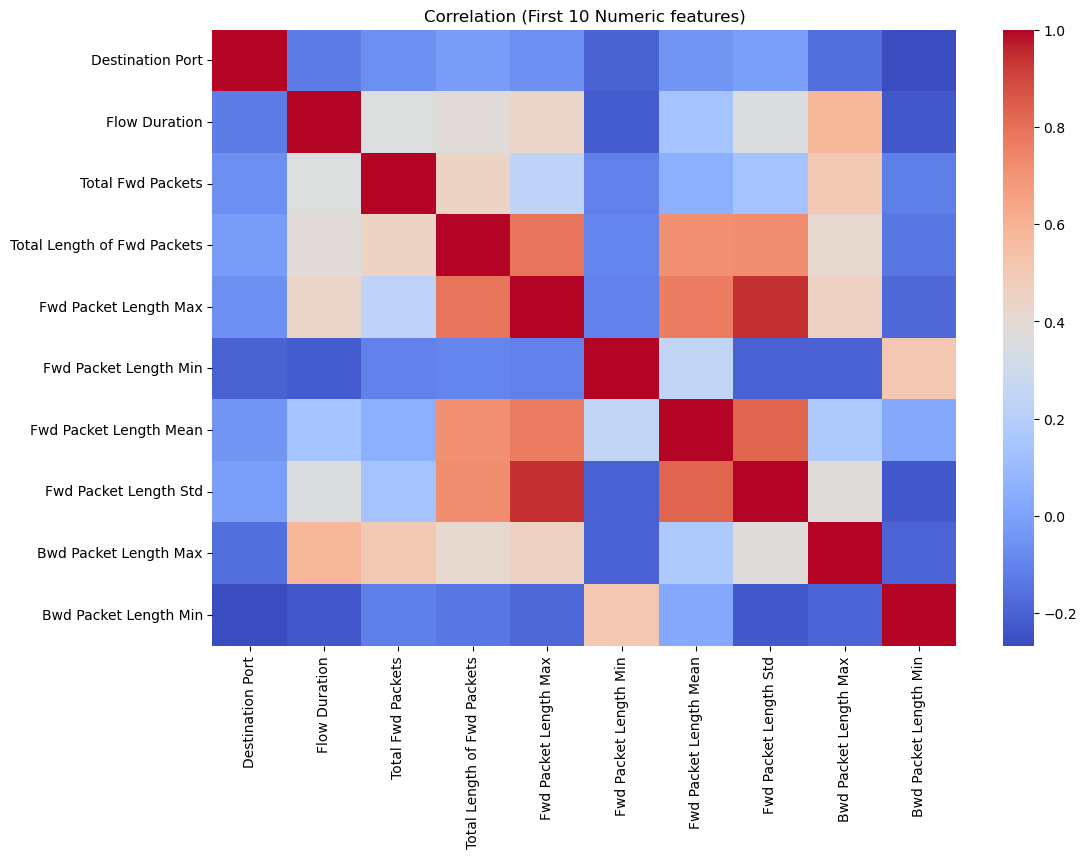

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sample[numeric_cols].corr().iloc[:10,:10],cmap = "coolwarm", annot=False)
plt.title("Correlation (First 10 Numeric features)")
plt.show()

In [9]:
#Cell A - detect exact unique labels and rough counts
import pandas as pd, os
CSV_PATH = "cicids2017_cleaned.csv"
chunksize = 200000

label_col = None
#find label column name robustly (attack/label)
for c in pd.read_csv(CSV_PATH, nrows=0).columns:
    if "label" in c.lower() or "attack" in c.lower() or "type" in c.lower():
        label_col = c
        break;

print("Using label column:", label_col)

from collections import Counter
cnt = Counter()
for chunk in pd.read_csv(CSV_PATH, chunksize=chunksize, usecols=[label_col]):
    cnt.update(chunk[label_col].astype(str).str.strip().values)

top = cnt.most_common(30)
for lab,ct in top:
    print(f"{lab!r}:{ct:,}")

with open("label_counts.txt","w") as f:
    for lab,ct in top:
        f.write(f"{lab}\t{ct}\n")

print("\nWrote label_counts.txt")

Using label column: Attack Type
'Normal Traffic':2,095,057
'DoS':193,745
'DDoS':128,014
'Port Scanning':90,694
'Brute Force':9,150
'Web Attacks':2,143
'Bots':1,948

Wrote label_counts.txt


In [10]:
import re
def is_benign_label(s):
    s = str(s).strip().lower()
    return bool(re.search(r'\b(benign|normal traffic|normal_traffic|normal-traffic)\b',s))

print("Benign examples:", is_benign_label("BENIGN"), is_benign_label("Normal traffic"), is_benign_label("BENIGN "))

Benign examples: True True True


In [11]:
import pandas as pd, numpy as np, os, math
from pathlib import Path

CSV_PATH = "cicids2017_cleaned.csv"
OUT_DIR = Path("processed_parquet")
OUT_DIR.mkdir(exist_ok=True)
chunksize = 150000
label_col = None

for c in pd.read_csv(CSV_PATH, nrows=0).columns:
    if "label" in c.lower() or "attack" in c.lower() or "type" in c.lower():
        label_col = c;
        break

if label_col is None:
    raise ValueError("Couldn't locate label column automatically. Edit the script with the correct column name.")

def downcast_df(df):
    for col in df.select_dtypes(include=['int64','int32']).columns:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')

    return df

chunk_i = 0
label_counts = {}
for chunk in pd.read_csv(CSV_PATH, chunksize=chunksize):
    chunk['label_bin'] = chunk[label_col].astype(str).apply(lambda s: 0 if is_benign_label(s) else 1)
    
    chunk = downcast_df(chunk)

    if chunk_i == 0:
        chunk.head(100).to_csv("sample_head.csv", index=False)

    out_path = OUT_DIR / f"chunk_{chunk_i:03d}.parquet"
    chunk.to_parquet(out_path, index=False)

    vc = chunk['label_bin'].value_counts().to_dict()
    for k,v in vc.items():
        label_counts[k] = label_counts.get(k,0) + int(v)

    print(f"Wrote {out_path} rows={len(chunk)} bin_counts={vc}")
    chunk_i += 1

print("\nTotal chunks writen:", chunk_i)
print("Aggregated binary label counts:", label_counts)
with open("label_bin_counts.txt","w") as f:
    f.write(str(label_counts))
print("Wrote label_bin_counts.txt")

Wrote processed_parquet\chunk_000.parquet rows=150000 bin_counts={0: 87397, 1: 62603}
Wrote processed_parquet\chunk_001.parquet rows=150000 bin_counts={0: 119787, 1: 30213}
Wrote processed_parquet\chunk_002.parquet rows=150000 bin_counts={0: 144062, 1: 5938}
Wrote processed_parquet\chunk_003.parquet rows=150000 bin_counts={0: 148301, 1: 1699}
Wrote processed_parquet\chunk_004.parquet rows=150000 bin_counts={0: 148877, 1: 1123}
Wrote processed_parquet\chunk_005.parquet rows=150000 bin_counts={0: 79957, 1: 70043}
Wrote processed_parquet\chunk_006.parquet rows=150000 bin_counts={0: 91618, 1: 58382}
Wrote processed_parquet\chunk_007.parquet rows=150000 bin_counts={0: 150000}
Wrote processed_parquet\chunk_008.parquet rows=150000 bin_counts={0: 150000}
Wrote processed_parquet\chunk_009.parquet rows=150000 bin_counts={0: 150000}
Wrote processed_parquet\chunk_010.parquet rows=150000 bin_counts={0: 148437, 1: 1563}
Wrote processed_parquet\chunk_011.parquet rows=150000 bin_counts={0: 149615, 1: 

In [12]:
import pandas as pd
sample = pd.read_parquet(list(OUT_DIR.glob("chunk_*.parquet"))[0])
num_cols = sample.select_dtypes(include='number').columns.tolist()
print("Numeric columns (sample):", num_cols[:30])
candidates = [
    'Flow.Duration', 'Flow.Duration..ms.', 'Flow.Duration', 'Total Fwd Packets', ' Total Backward Packets',
    ' Total Length of Fwd Packets', ' Total Length of Bwd Packets',
    'Fwd Packet Length Mean','Bwd Packet Length Mean','Fwd Header Length.1','Init_Win_bytes_forward',
    'Init_Win_bytes_backward','Fwd Packet Length Max','Flow IAT Mean','Flow IAT Min','Flow IAT Max',
    'Packet Length Mean','Average Packet Size','Avg Fwd Segment Size','Protocol'
]
present = [c for c in candidates if c in sample.columns]
print("Recommended features present in this dataset (subset):", present)


Numeric columns (sample): ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length']
Recommended features present in this dataset (subset): ['Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Fwd Packet Length Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Max', 'Packet Length Mean', 'Average Packet Size']



Accuracy: 0.99936

Classification Report:
               precision    recall  f1-score   support

           0      0.999     1.000     1.000     87812
           1      0.999     0.998     0.999     24688

    accuracy                          0.999    112500
   macro avg      0.999     0.999     0.999    112500
weighted avg      0.999     0.999     0.999    112500



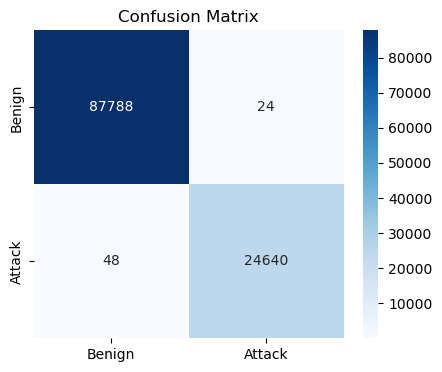

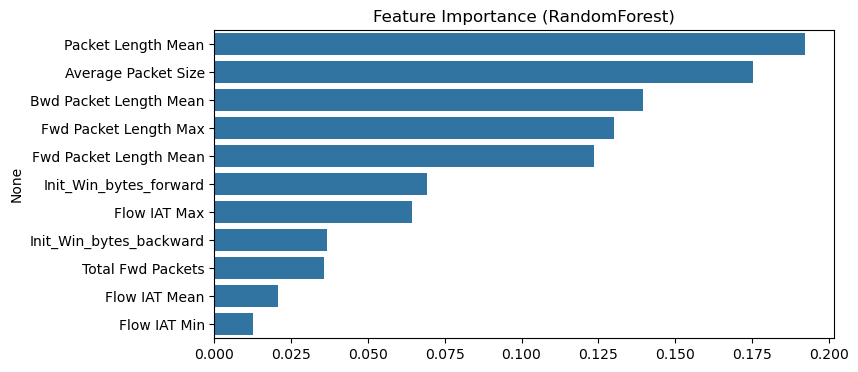

In [13]:
# Cell E — Baseline RandomForest Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Load 2-3 chunks max to keep it light
files = sorted(glob.glob("processed_parquet/chunk_0*.parquet"))[:3]
df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)

# Select features and label
features = [
    'Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'Fwd Packet Length Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Max',
    'Packet Length Mean', 'Average Packet Size'
]

X = df[features].fillna(0)
y = df['label_bin']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train baseline model
rf = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=imp.values, y=imp.index)
plt.title("Feature Importance (RandomForest)")
plt.show()


In [16]:
# Fix + diagnostic cell: re-define feature_cols, ensure rf exists, then run diagnostics
import glob, os, pandas as pd, numpy as np
from pathlib import Path

# --- 1) (Re)define the feature list we used earlier (fallback)
feature_cols = [
    'Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'Fwd Packet Length Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Max',
    'Packet Length Mean', 'Average Packet Size'
]
print("feature_cols set to:", feature_cols)

# --- 2) Ensure processed_parquet exists
pdir = Path("processed_parquet")
if not pdir.exists():
    raise FileNotFoundError("processed_parquet directory not found. Make sure you ran the chunking cell (Cell C).")

# --- 3) Check if rf exists; if not, train a quick RF on first 2 chunks
need_train = False
try:
    rf  # noqa: F821
    print("RandomForest model 'rf' already in memory. Great.")
except NameError:
    need_train = True
    print("RandomForest 'rf' not found in memory — will train a quick baseline on first 2 chunks now.")

if need_train:
    from sklearn.ensemble import RandomForestClassifier
    print("Loading first 2 parquet chunks to train a quick RF (this is lightweight)...")
    files = sorted(glob.glob("processed_parquet/chunk_*.parquet"))[:2]
    if not files:
        raise FileNotFoundError("No parquet chunk files found in processed_parquet. Check your earlier chunking step.")
    df_small = pd.concat([pd.read_parquet(f)[feature_cols + ['label_bin']].fillna(0) for f in files], ignore_index=True)
    X_tr = df_small[feature_cols]
    y_tr = df_small['label_bin']
    rf = RandomForestClassifier(n_estimators=80, max_depth=12, n_jobs=-1, random_state=42)
    rf.fit(X_tr, y_tr)
    print("Quick RF trained on", len(df_small), "rows.")

# --- 4) Diagnostic on stream files (same logic as before)
stream_files = sorted(glob.glob("processed_parquet/chunk_*.parquet"))[3:5]  # adjust slice if you want other chunks
print("\nStream files (count):", len(stream_files))
for f in stream_files:
    print("->", f)

if not stream_files:
    print("No stream files found in that slice. Listing first 50 files in processed_parquet:")
    print(sorted(os.listdir("processed_parquet"))[:50])
else:
    total_rows = 0
    total_alerts = 0
    for f in stream_files:
        df_stream = pd.read_parquet(f)
        print(f"\nFile: {f}")
        print("Rows in file:", len(df_stream))
        total_rows += len(df_stream)
        print("First row columns sample:", df_stream.columns.tolist()[:30])
        missing = [c for c in feature_cols if c not in df_stream.columns]
        print("Missing feature cols in this chunk (should be empty):", missing)
        if missing:
            print("Skipping prediction for this file due to missing features.")
            continue
        X_chunk = df_stream[feature_cols].fillna(0)
        preds = rf.predict(X_chunk)
        unique, counts = np.unique(preds, return_counts=True)
        print("Prediction value counts:", dict(zip(unique.tolist(), counts.tolist())))
        alerts = df_stream.loc[preds == 1]
        print("Alert rows found:", len(alerts))
        if len(alerts) > 0:
            # show a compact preview of up to 8 alerts
            display(alerts.head(8)[feature_cols + ['label_bin']])
        total_alerts += len(alerts)
    print(f"\nTOTAL rows scanned: {total_rows}, TOTAL alerts: {total_alerts}")


feature_cols set to: ['Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Fwd Packet Length Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Max', 'Packet Length Mean', 'Average Packet Size']
RandomForest model 'rf' already in memory. Great.

Stream files (count): 2
-> processed_parquet\chunk_003.parquet
-> processed_parquet\chunk_004.parquet

File: processed_parquet\chunk_003.parquet
Rows in file: 150000
First row columns sample: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd

,Total Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Init_Win_bytes_forward,Init_Win_bytes_backward,Fwd Packet Length Max,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Packet Length Mean,Average Packet Size,label_bin
2741,3,0.0,0.0,29200,28960,0,1727746.333,96,5151187,0.0,0.0,0
2823,3,0.0,0.0,29200,28960,0,1968597.333,96,5881897,0.0,0.0,0
2842,3,0.0,0.0,29200,28960,0,1765252.000,92,5272411,0.0,0.0,0
2844,3,0.0,0.0,29200,28960,0,1785512.667,115,5318442,0.0,0.0,0
4574,3,0.0,0.0,29200,28960,0,1837485.333,96,5489157,0.0,0.0,0
6213,3,0.0,0.0,29200,28960,0,1960783.333,101,5765892,0.0,0.0,0
8475,3,0.0,0.0,29200,28960,0,1687297.667,100,5023766,0.0,0.0,0
17533,3,0.0,0.0,29200,28960,0,1891548.000,109,5637707,0.0,0.0,0



File: processed_parquet\chunk_004.parquet
Rows in file: 150000
First row columns sample: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length']
Missing feature cols in this chunk (should be empty): []
Prediction value counts: {0: 149995, 1: 5}
Alert rows found: 5


,Total Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Init_Win_bytes_forward,Init_Win_bytes_backward,Fwd Packet Length Max,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Packet Length Mean,Average Packet Size,label_bin
4010,3,0.0,0.0,29200,28960,0,1750732.333,89,5219899,0.0,0.0,0
22041,3,0.0,0.0,29200,28960,0,1953088.000,96,5836024,0.0,0.0,0
31800,3,0.0,0.0,29200,28960,0,1939253.000,187,5794537,0.0,0.0,0
31872,3,0.0,0.0,29200,28960,0,1767606.667,91,5273077,0.0,0.0,0
35753,3,0.0,0.0,29200,28960,0,1934497.000,159,5780296,0.0,0.0,0



TOTAL rows scanned: 300000, TOTAL alerts: 67


In [21]:
import os
os.makedirs("models", exist_ok=True)
print("✅ Created 'models' folder.")


✅ Created 'models' folder.


In [22]:
# save_model.py (run in notebook or as script)
import joblib
import json

# rf and features should be in memory after you trained; otherwise run training or use the quick-train fallback earlier
joblib.dump(rf, "models/rf_baseline.joblib")
with open("models/feature_cols.json", "w") as f:
    import json
    json.dump(feature_cols, f)
print("Saved model -> models/rf_baseline.joblib")


Saved model -> models/rf_baseline.joblib


In [23]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

file_path = "mini-ids/data/processed_parquet/chunk_000.parquet"
df = pd.read_parquet(file_path)
print(df.columns.tolist())


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Average Packet Size', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Id

In [1]:
import sys
print(sys.executable)


C:\Users\rudraash\anaconda3\python.exe


In [3]:
!"{sys.executable}" -m pip install pyshark